<a href="https://colab.research.google.com/github/kaylanelira/Dogs-Image-Classifier/blob/main/miniProject_kgl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Using Azure's search key so I can use bing search.

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '81f47a7fbaf6489fa1457534fa10e019')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

# *Dogs breeds*

## clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [5]:
results = search_images_bing(key, 'dogs')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
dest = 'images/dogs.jpg'
download_url(ims[0], dest)

Path('images/dogs.jpg')

Using fastai's download_images to download all the URLs for each of the search terms.

In [7]:
dogs_types = 'dachshund', 'chihuahua', 'pitbull'
path = Path('dogs')

In [8]:
if not path.exists():
    path.mkdir()
    for o in dogs_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dogs')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
fns

(#427) [Path('dogs/chihuahua/f7fccfae-422a-4e3d-8e6c-dd58a26eeded.jpg'),Path('dogs/chihuahua/942b9957-521b-462e-8155-14aa79cdb6c0.jpg'),Path('dogs/chihuahua/9b368241-94cf-4605-b61d-33f4e92af65d.jpg'),Path('dogs/chihuahua/79a54521-2cb0-4f84-a910-391594df00bc.jpg'),Path('dogs/chihuahua/fd6eabee-1e19-4283-92b3-98889c673a38.jpg'),Path('dogs/chihuahua/8b90d0b8-7e29-4794-a781-7fea43c7a544.jpeg'),Path('dogs/chihuahua/ce919aa6-f9c1-4f8c-ade3-123c3783b78b.jpg'),Path('dogs/chihuahua/7f071317-e189-472b-b453-1dcf8f4f4537.jpg'),Path('dogs/chihuahua/84d8750b-94e1-4f95-9a52-fbc335327390.jpg'),Path('dogs/chihuahua/27783636-9401-45c4-b53a-4bd850afceac.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#1) [Path('dogs/pitbull/26fd6f33-0a20-4511-a5f1-ab2ef2f802de.jpg')]

In [11]:
failed.map(Path.unlink);

## From Data to DataLoaders

Creating DataLoaders for the dataset that was just downloaded 

In [12]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = dogs.dataloaders(path)

Showing some of the search results.

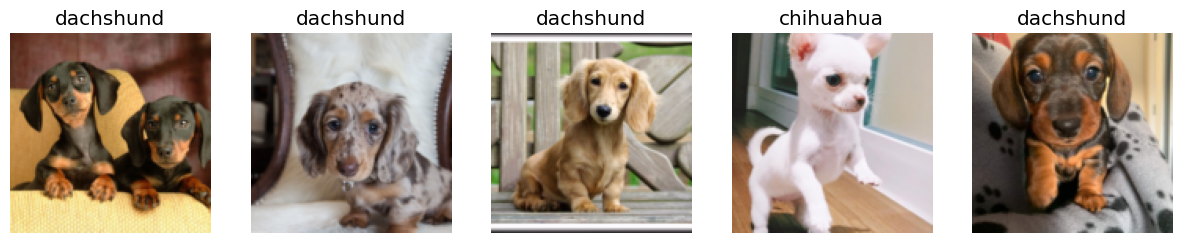

In [14]:
dls.valid.show_batch(max_n=5, nrows=1)

Showing how the squish method works.

In [15]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

Showing how pad method works on some images


In [16]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

Showing how random resized crop works on sample.

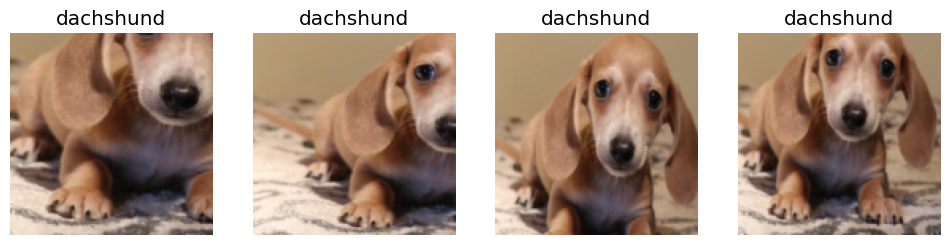

In [17]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Data Augmentation

Using augmentations techniques on the sample.

In [18]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

Training the bear classifier.

In [19]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 157MB/s]


Making model's confusion matrix.

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
interp.plot_top_losses(6, nrows=2)

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## Turning Your Model into an Online Application

### Using the Model for Inference

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict('images/dogs.jpg')

('dachshund', tensor(1), tensor([0.0045, 0.9647, 0.0307]))

In [29]:
learn_inf.dls.vocab

['chihuahua', 'dachshund', 'pitbull']

### Creating a Notebook App from the Model

Creating upload widget

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Next, grabbing the image

In [32]:
img = PILImage.create(btn_upload.data[-1])

Using an output widget to display

In [33]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Using a label to display predictions

In [34]:
# predictions
pred,pred_idx,probs = learn_inf.predict(img)
# display
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dachshund; Probability: 0.9647')

Making a button and a event handler to do the classification

In [35]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Putting all in a vertical box to complete GUI:

In [37]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [38]:
VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])